<b> 
    GROUP Members <br> 
    1819369 Senoelo Kaone <br> 
    1821249 Ravelle Tsireledzo
    
</b>


# Object Identification and Classification using Convolutional Neural Network.

## Abstract

 On this project we perform image classification on the <a href='http://www.cs.toronto.edu/~kriz/cifar.html'>CIFAR-10 Dataset</a>. The dataset is made up of 60 000 images which are 32 by 32 pixels and they can be categorized into 10 classes[0:airplane, 1:automobile, 2:bird, 3:cat, 4:deer, 5:dog, 6:frog, 7:horse, 8:ship, 9:truck]. Convolutional neural networks have emerged as dominant image classifier because of their capability to extract dominant features with relative ease. We will explore the influence of multiple convolution layers on model accuracy, then we shall explore various ways to improve learning and the performace of the model. Our CNN will use ReLU activation function from input to output layer beacuse it helps to surmount vanishing gradient problem, then sigmoid activation function will be used in the output layer to represent probabilistic values of each class ,then, the most probable class will be selected as the correct class. The loss function that we shall utilize is Cross-Entropy Loss function beacuse it works than MSE loss function in classification problems. 
 Because of the limit in computation power we shall train the models for 10 epochs.

In [3]:
import sys
from matplotlib import pyplot
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

## Loading of CIFAR-10 dataset and data splitting

First Nine Images in TRAIN Dataset:


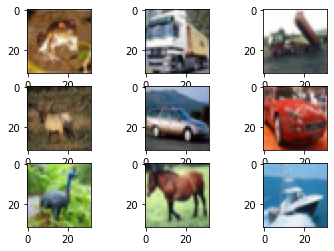

First Nine Images in TEST Dataset:


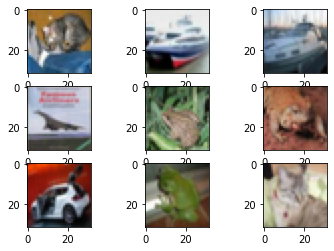

Training set labels:
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
(50000, 1)
Testing set labels:
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
(10000, 1)
Training set labels in Binary Representation:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
(50000, 10)
Testing set labels in Binary Representation:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
(10000, 10)


In [18]:
# Loading the dataset
def load_dataset():
    (train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
  
    # Data Visualization
    for i in range(9):
        # define subplot
        pyplot.subplot(330 + 1 + i)
        # plot raw pixel data
        pyplot.imshow(train_images[i])
        
    print("First Nine Images in TRAIN Dataset:")
    pyplot.show()

    for i in range(9):
        # define subplot
        pyplot.subplot(330 + 1 + i)
        # plot raw pixel data
        pyplot.imshow(test_images[i])
    
    print("First Nine Images in TEST Dataset:")
    pyplot.show()
    
    # Labels before applying the function
    print("Training set labels:")
    print(train_labels)
    print(train_labels.shape)
  
    print("Testing set labels:")
    print(test_labels)
    print(test_labels.shape)
  
    #Applying the function to training set labels and testing set labels

    train_labels = to_categorical(train_labels, dtype ="uint8")
    test_labels = to_categorical(test_labels, dtype ="uint8")
  
    # Labels after applying the function
    print("Training set labels in Binary Representation:")
    print(train_labels)
    print(train_labels.shape)
  
    print("Testing set labels in Binary Representation:")
    print(test_labels)
    print(test_labels.shape)
    return train_images, train_labels, test_images, test_labels

# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)

## Normalization of data
We divide each by maximum rba value which is 255 so that the range is between 0 and 1

In [19]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

## Implementing CNN with various convolutional layers and their perfomance evaluation (BASELINE) ALGORITHMS

### Construction of CNN with two convolutional layers

In [20]:
def define_model_lev1(learning_rate=0.001):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=learning_rate, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model



### Diagnostic function to evaluate how the models has performed. 
We plot cross entropy loss on the training and tets datasets at each epoch, then we can ascertain how the model performance whether it is overfitting or not. Then we plot measure of accuracy as the models training during testing and training phases.

In [21]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.show()
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

### Define a function to fit the model and evaluate its accuracy

In [25]:
# run the test harness for evaluating a model
def run_test_harness(model,epochs=10):
    # fit model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=64, validation_data=(testX, testY), verbose=0)
    # save model
    model.save('final_model.h5')
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('Model Accuracy is > %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

Model Accuracy is > 65.120


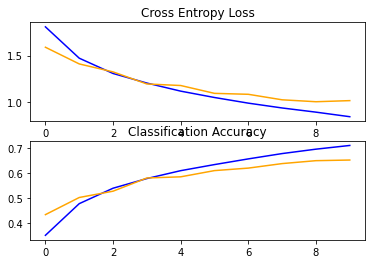

In [26]:
model  = define_model_lev1()
run_test_harness(model)

#### Conclusion on CNN with 2 convolutional layers
The model had the accuracy of 65%. When we evaluate the cross-entropy of the model during training(blue) and test datasets(orange) we can see that the loss was significantly reducing indicating that the model was performing well. When we consider accuracy plot we can see that there is sharp increase accuracy as the number of epoches increases, there is also a good chance that if increase the number of epoches the model would tend to over-fit.

### Model definition of CNN with four convolutional layers

In [28]:

# define cnn model
def define_model_lev2():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

/home/kaone/.local/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model Accuracy is > 68.140


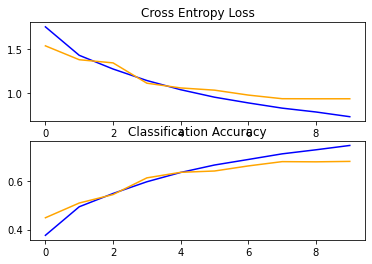

In [29]:
model2  = define_model_lev2()
run_test_harness(model2)

#### Conclusion on CNN with 4 convolution layers
The model has an accuracy of 68% which greater than the accuracy we got in the previous model and the cross-entropy loss and accuracy plots are not that deviating.

### Constructing CNN with 6 convolutional layers

In [ ]:
# define cnn model
def define_model_lev3():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Model Accuracy is > 69.720


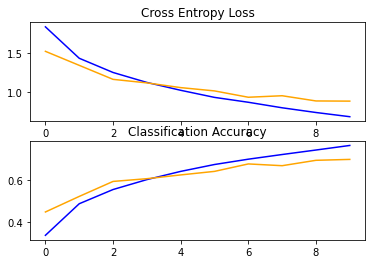

In [31]:
model3  = define_model_lev3()
run_test_harness(model3)

#### Model evaluation
The model has an accuracy of 70% which the greatest amongst all models. We can see that cross entropy loss is approaching as number of epoches indicating that the model is doing excellently well to learn training data(Blue). We can see that there is possible lower bound of 1 in testing phase implying that model cannot get better anymore.

#### All models conclusion
From our results it is clear by increasing number of convolutional layers we can extract more features and make better predictions. We can also notice there is rapid overfitting during training phase indicating that we might need to regularize the weights or weights drop. We have not explored various improved learning methods such as optimum learning rate. We shall explore these improved learning methods on the superior convolutional network the one with six layers.

## Improved learning on a CNN with 6 convolutional layers

### Using drop-out method
Our drop out rate is dropping 20% of layers after each max-pooling layer

In [32]:


# define cnn model
def define_model_lev31():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Model Accuracy is > 65.030


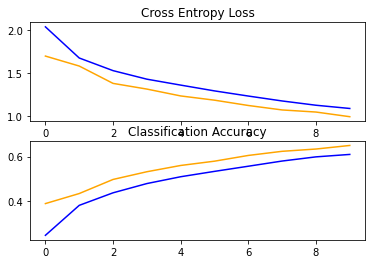

In [33]:
model4  = define_model_lev31()
run_test_harness(model4)

#### Results evaluation
As it is depicted in the above plots we can conclude that random weights drop method fixes the issue of overfitting and the model is improving consistently during training phase.

### Using weight regularization

In [41]:
from tensorflow.keras.regularizers import l2
# define cnn model
def define_model_lev32():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Model Accuracy is > 69.490


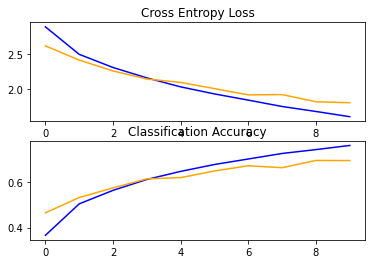

In [42]:
model5  = define_model_lev32()
run_test_harness(model5)

#### Results analysis
As it is depicted in the above plots the models tends to do well during the training phase the issue of rapid overfitting during training phase is solved hence we have high accuracy as the number of epoches increases implying that the model generalize well.

### Improved learning rate

In [38]:
# define cnn model
def define_model_lev33(learning_rate=0.001):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=learning_rate, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Model Accuracy is > 74.100


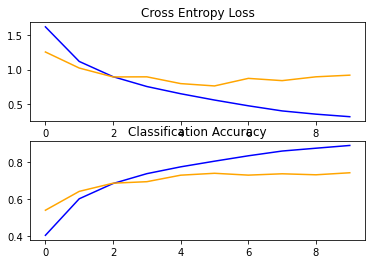

In [39]:
model6  = define_model_lev33(learning_rate=0.01)
run_test_harness(model6)

Model Accuracy is > 64.930


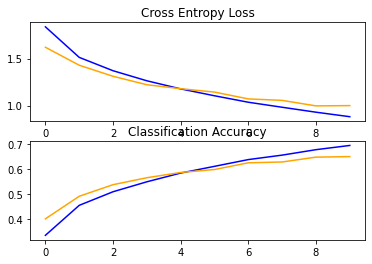

In [40]:
model7  = define_model_lev33(learning_rate=0.0005)
run_test_harness(model7)

#### Results analysis
We have explored learing rate of 0.01 and we got accuarcy  of 74%, then we explored the learning rate of 0.001 during baseline algorithms evaluation and the accuracy was 70% the lastly we explored learning rate of 0.0005 which yielded accuracy of 65% after 10 epoches. We can conclude that when learning rate is 0.01 the model converged quickly.

## Final conclusion

We have explored CNN to cifar-10 datasets for image classification. We saw that CNN model tends to improve its prediction as the number its convulation layers increase but this comes at a cost as we end up with a model that overfits the data. To address the latter issue we used drop out method to drop a portion of weights at each layer, this helped to address the issue of fitting. Then we used weights regularization as an alternative method to address overfitting issue because when we using random drop out we end up throwing important features. Regulirization worked better than drop-out method in terms of prediction accuracy. Finally, we used various learing rates to see improve the rate of convergence we saw that by increasing learning rate our modelled converged faster and produced an outstanding accuarcy of 75%.

## Limitations and further considerations

We had limitation in computation power hence we could not explore what happens when number of epoches increase. consequently, we could not explore what are optimum hyperparameters for regularization and for number of layer or different pooling methods.

This models can be explored on other images which are not 32 by 32 pixels to see how it performs. One can also explore what happens as we increase number of clusters.